<a href="https://colab.research.google.com/github/shionguha/inf2178-expdesignfordatascience-w23/blob/main/Power_analysis_example03_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
pd.options.display.max_columns = None #show all columns in data

# load the dataset 

In [8]:
dataset = pd.read_csv('student-mat.csv')

In [9]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


#some useful functions you can call
This is the same code as you see from the course notebook but in function form https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/main/notebooks/power.ipynb 

In [7]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

We calculate the sample size needed for each sample group to achieve a given power (in this case, 0.8) for the below t-tests. For the ratio input in TTestIndPower().solve_power, we calculated the ratio of one sample against the other based on the information we have from our dataset. Please remember, nobs 1 in the solve_power function is only the number of observations in one sample group. nobs 2 is thus the number of observations in the second sample group. And ratio*nobs2=nobs1.

In [20]:
#create family size groups from dataset 
#creating two different datasets one with famsize >3 and the other <3
LE3_famsize = dataset[dataset['famsize']=='LE3']
GT3_famsize = dataset[dataset['famsize']=='GT3']

LE3_G3 = LE3_famsize['G3']
GT3_G3 = GT3_famsize['G3']

In [22]:
GT3_famsize

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2,2,at_home,other,other,mother,2,3,0,no,no,yes,no,yes,yes,no,no,5,3,3,1,3,4,2,10,9,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6
387,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,0,7,5,0
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0


In [13]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(LE3_G3,GT3_G3)
alpha = 0.05
power = 0.8
ratio_ =len(LE3_G3)/len(GT3_G3) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)

Effect size (Cohen's D) for period 3 grades: 0.17980237472505356


Example write up for above: Prior to computing a t-test to analyze whether a students’ final grade (outcome variable) differed between family sizes less than and greater than three (3) (two-level explanatory variable), we calculated the effect size of the explanatory variable using Cohen's D metric, which was 0.17.

In [15]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for GT3_G3') 
print('Actual size of GT3_G3:', len(GT3_G3))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for LE3_G3')
print('Actual size of LE3_G3:', len(LE3_G3))

Sample Size of nobs1: 842.586 needed for GT3_G3
Actual size of GT3_G3: 281
Sample Size of nobs2: 341.832 needed for LE3_G3
Actual size of LE3_G3: 114


Example write up: After obtaining the effect size, the required sample size was computed using the obtained effect size and establishing the statistical power at 80%. The results indicated that a sample size of 341 was required for family size less than three, while a sample size of 842 was required for family size greater than three. This is significant because the sample size provided in the dataset are 114 and 281 respectively, which impacts the reliability of the results.  

Extra note on computing the ratio: ">>>smp.TTestIndPower().solve_power(0.3, power=0.75, ratio=2, alpha=0.05, alternative='larger') array([ 90.11015096]) In this case we need about 90 observations in sample 1, and about 180 observations in sample 2 I am not specifying the number of observations for the second sample, but instead I define ratio with **nobs2 = nobs1 * ratio**. I thought this would be more useful, since we can calculate the sample size to achieve a given power, when we want, for example, twice as many observations in one than the other sample". Original post: http://jpktd.blogspot.com/2013/03/statistical-power-in-statsmodels.html

In [18]:
#another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=281, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


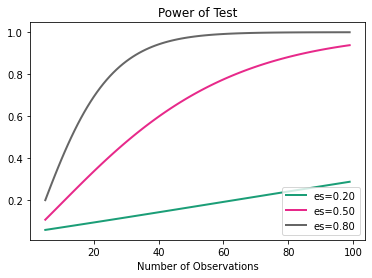

In [19]:
#lastly power curve

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()